In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import seaborn as sns
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#https://tianchi.aliyun.com/course/278/3413

In [10]:
x_fearures = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0, 0, 0, 1, 1, 1])

## 调用逻辑回归模型
lr_clf = LogisticRegression()
#参数：penalty：默认: ‘l2’在调参时如果我们主要的目的只是为了解决过拟合，
#一般penalty选择L2正则化就够了。但是如果选择L2正则化发现还是过拟合，即预测效果差的时候，
#就可以考虑L1正则化。另外，如果模型的特征非常多，我们希望一些不重要的特征系数归零，从而让模型系数稀疏化的话，也可以使用L1正则化
#solver:liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数.
#lbfgs/newton-cg:拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
#sag:随机平均梯度下降法，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候，是一种线性收敛算法，这个速度远比SGD快。
## 用逻辑回归模型拟合构造的数据集，即求出3个系数，此时相当于训练模型
lr_clf = lr_clf.fit(x_fearures, y_label) #其拟合方程为 y=w0+w1*x1+w2*x2

In [17]:
## 查看其对应模型的w
print('the weight of Logistic Regression:',lr_clf.coef_)

## 查看其对应模型的w0
print('the intercept(w0) of Logistic Regression:',lr_clf.intercept_)

the weight of Logistic Regression: [[0.73455784 0.69539712]]
the intercept(w0) of Logistic Regression: [-0.13139986]


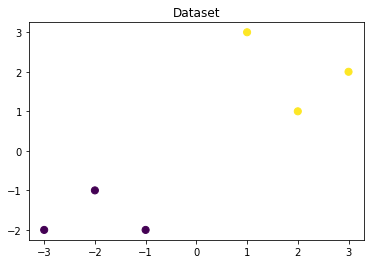

In [18]:
#模型可视化
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')
plt.show()

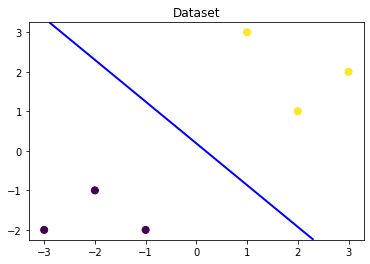

In [19]:
# 可视化决策边界
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))

z_proba = lr_clf.predict_proba(np.c_[x_grid.ravel(), y_grid.ravel()])
z_proba = z_proba[:, 1].reshape(x_grid.shape)
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2., colors='blue')

plt.show()

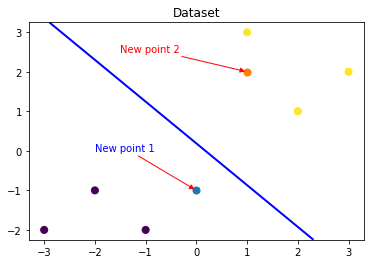

In [22]:
### 可视化预测新样本

plt.figure()
## new point 1
x_fearures_new1 = np.array([[0, -1]])
plt.scatter(x_fearures_new1[:,0],x_fearures_new1[:,1], s=50, cmap='viridis')
plt.annotate(s='New point 1',xy=(0,-1),xytext=(-2,0),color='blue',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

## new point 2
x_fearures_new2 = np.array([[1, 2]])
plt.scatter(x_fearures_new2[:,0],x_fearures_new2[:,1], s=50, cmap='viridis')
plt.annotate(s='New point 2',xy=(1,2),xytext=(-1.5,2.5),color='red',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

## 训练样本
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')

# 可视化决策边界
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2., colors='blue')

plt.show()

In [23]:
## 在训练集和测试集上分别利用训练好的模型进行预测
y_label_new1_predict = lr_clf.predict(x_fearures_new1)
y_label_new2_predict = lr_clf.predict(x_fearures_new2)

print('The New point 1 predict class:\n',y_label_new1_predict)
print('The New point 2 predict class:\n',y_label_new2_predict)

## 由于逻辑回归模型是概率预测模型（前文介绍的 p = p(y=1|x,\theta)）,所以我们可以利用 predict_proba 函数预测其概率
y_label_new1_predict_proba = lr_clf.predict_proba(x_fearures_new1)
y_label_new2_predict_proba = lr_clf.predict_proba(x_fearures_new2)

print('The New point 1 predict Probability of each class:\n',y_label_new1_predict_proba)
print('The New point 2 predict Probability of each class:\n',y_label_new2_predict_proba)

The New point 1 predict class:
 [0]
The New point 2 predict class:
 [1]
The New point 1 predict Probability of each class:
 [[0.69567724 0.30432276]]
The New point 2 predict Probability of each class:
 [[0.11983936 0.88016064]]


In [35]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
iris_target = iris['target']
iris_features = pd.DataFrame(iris['data'],columns=iris.feature_names)

In [39]:
iris_features.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
dic1={0:'setosa',1:'versicolor',2:'virginica'}
iris_features['target']=pd.Series(iris['target']).map(dic1)

In [60]:
iris_features.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [67]:
iris_all=iris_features
iris_features.drop('target',axis='columns',inplace=True)

In [89]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

## 选择其类别为0和1的样本 （不包括类别为2的样本）
iris_features_part = iris_features.iloc[:100]
iris_target_part = iris_target[:100]

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(iris_features_part, iris_target_part, test_size = 0.2, random_state = 2020)
#如果不指定test_size，函数默认分为25：75
#random_state相当于随机数种子，同样的随机数种子，对于相同数据返回的训练集测试集生成结果是相同的

In [90]:
clf = LogisticRegression(random_state=0, solver='lbfgs')

In [91]:
#训练模型
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [92]:
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

The accuracy of the Logistic Regression is: 1.0
The accuracy of the Logistic Regression is: 1.0
The confusion matrix result:
 [[ 9  0]
 [ 0 11]]


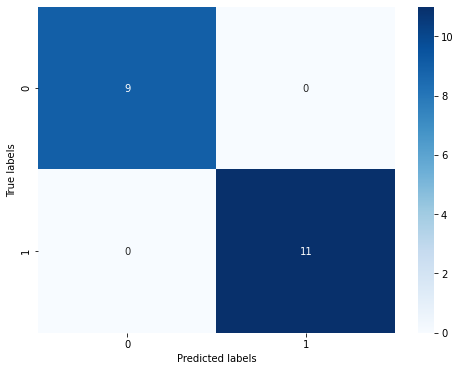

In [98]:
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))
## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)
# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [99]:
## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size = 0.2, random_state = 2020)

In [100]:
clf = LogisticRegression(random_state=0, solver='lbfgs')

In [101]:
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [102]:
## 查看其对应的w
print('the weight of Logistic Regression:\n',clf.coef_)

## 查看其对应的w0
print('the intercept(w0) of Logistic Regression:\n',clf.intercept_)

## 由于这个是3分类，所有我们这里得到了三个逻辑回归模型的参数，其三个逻辑回归组合起来即可实现三分类。

the weight of Logistic Regression:
 [[-0.45928925  0.83069892 -2.26606529 -0.99743983]
 [ 0.33117319 -0.72863426 -0.06841147 -0.98711029]
 [ 0.12811606 -0.10206466  2.33447676  1.98455011]]
the intercept(w0) of Logistic Regression:
 [  9.43880649   3.93047365 -13.36928015]


In [104]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 由于逻辑回归模型是概率预测模型（前文介绍的 p = p(y=1|x,\theta)）,所有我们可以利用 predict_proba 函数预测其概率
train_predict_proba = clf.predict_proba(x_train)
test_predict_proba = clf.predict_proba(x_test)

print('The test predict Probability of each class:\n',test_predict_proba)
## 其中第一列代表预测为0类的概率，第二列代表预测为1类的概率，第三列代表预测为2类的概率。

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

The test predict Probability of each class:
 [[1.03461743e-05 2.33279482e-02 9.76661706e-01]
 [9.69926591e-01 3.00732871e-02 1.21677013e-07]
 [2.09992555e-02 8.69156613e-01 1.09844131e-01]
 [3.61934879e-03 7.91979964e-01 2.04400687e-01]
 [7.90943229e-03 8.00605296e-01 1.91485271e-01]
 [7.30034944e-04 6.60508053e-01 3.38761912e-01]
 [1.68614215e-04 1.86322047e-01 8.13509339e-01]
 [1.06915328e-01 8.90815535e-01 2.26913684e-03]
 [9.46928073e-01 5.30707271e-02 1.20016067e-06]
 [9.62346387e-01 3.76532214e-02 3.91897321e-07]
 [1.19533394e-04 1.38823471e-01 8.61056996e-01]
 [8.78881872e-03 6.97207354e-01 2.94003827e-01]
 [9.73938144e-01 2.60617331e-02 1.22613846e-07]
 [1.78434059e-03 4.79518175e-01 5.18697484e-01]
 [5.56924354e-04 2.46776840e-01 7.52666235e-01]
 [9.83549843e-01 1.64500657e-02 9.13617315e-08]
 [1.65201472e-02 9.54672748e-01 2.88071049e-02]
 [8.99853765e-03 7.82707573e-01 2.08293890e-01]
 [2.98015042e-05 5.45900078e-02 9.45380191e-01]
 [9.35695860e-01 6.43039548e-02 1.85301396e

The confusion matrix result:
 [[10  0  0]
 [ 0  8  2]
 [ 0  2  8]]


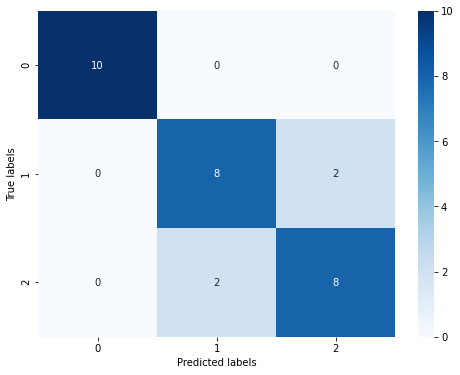

In [105]:
## 查看混淆矩阵
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()